<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-1">Prepare the data</a></span></li><li><span><a href="#Format-the-average-position" data-toc-modified-id="Format-the-average-position-2">Format the average position</a></span></li><li><span><a href="#Start-plotting-the-pass-network" data-toc-modified-id="Start-plotting-the-pass-network-3">Start plotting the pass network</a></span><ul class="toc-item"><li><span><a href="#Setup-the-Pitch" data-toc-modified-id="Setup-the-Pitch-3.1">Setup the Pitch</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
from mplsoccer import Pitch, FontManager, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['text.color'] = '#c7d5cc'  # set the default text color

## Prepare the data

In [2]:
# read csv
df = pd.read_csv(r'E:\Data\Football_Viz\Dataset\valladolidA.csv')
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [8]:
df = df[df['teamId']=='Barcelona']
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [9]:
# extract all the successed passing data
df['passer']=df['playerId']
df['recipient']=df['playerId'].shift(-1)

passes = df[df['type']=='Pass']
suc_passes=passes[passes['outcome']=='Successful']

In [12]:
# only for the starting11
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
subs.min()  # first substitution

70

In [13]:
suc_passes=suc_passes[suc_passes['minute']<subs.min()]
suc_passes

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [15]:
suc_passes['passer']=suc_passes['passer'].astype(int)
suc_passes['recipient']=suc_passes['recipient'].astype(int)

C:\Users\LINWEI~1\AppData\Local\Temp/ipykernel_14244/663684811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suc_passes['passer']=suc_passes['passer'].astype(int)
C:\Users\LINWEI~1\AppData\Local\Temp/ipykernel_14244/663684811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suc_passes['recipient']=suc_passes['recipient'].astype(int)


## Format the average position

In [17]:
avg_pos = suc_passes.groupby(by='passer').agg({'x':['mean'],'y':['mean','count']})
avg_pos.columns=['x','y','count']

In [18]:
avg_pos

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [25]:
# suc_passes.groupby(by=['passer','recipient'])['id'].count().reset_index()

,passer,recipient,id
0,1,2,3
1,1,4,3
2,1,8,4
3,1,9,1
4,1,15,4
...,...,...,...
85,28,8,13
86,28,9,3
87,28,10,5
88,28,18,1


In [24]:
pass_between = suc_passes.groupby(by=['passer','recipient'])['id'].count().reset_index()

In [27]:
pass_between.rename({'id':'pass_count'},axis=1,inplace=True)

In [32]:
# Join the position data to the right
# Both start position and the end position
#pd.merge(left=pass_between,right=avg_pos,on='passer',how='inner').merge(right=avg_pos,left_on='recipient',right_index=True,suffixes=['','_end'])

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
18,4,2,1,32.895833,43.518750,48,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
52,15,10,1,38.409091,74.378182,55,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


In [33]:
pass_df = pd.merge(left=pass_between,right=avg_pos,on='passer',how='inner').merge(right=avg_pos,left_on='recipient',right_index=True,suffixes=['','_end'])

In [34]:
# filter the data that at least has 3+ passes between the two players
pass_df=pass_df[pass_df['pass_count']>3]

## Start plotting the pass network

+ reference: https://mplsoccer.readthedocs.io/en/latest/index.html

### Setup the Pitch

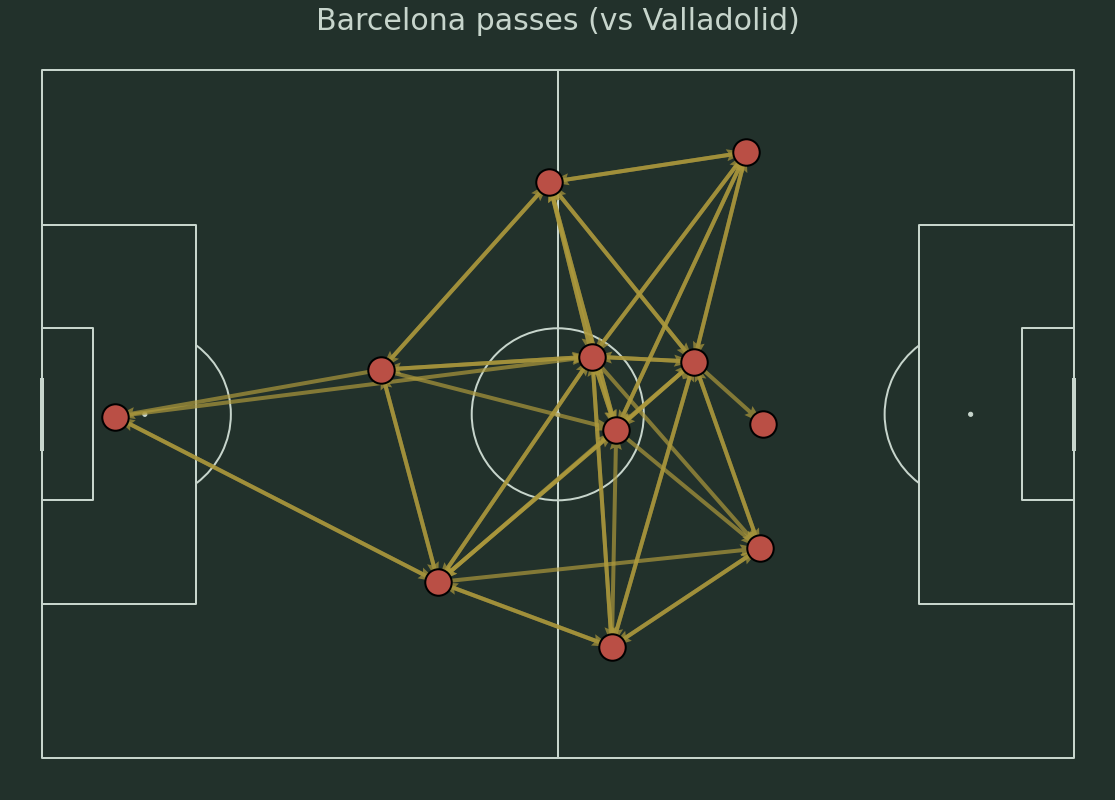

In [64]:
# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
arrows = pitch.arrows(1.2*pass_df.x,0.8*pass_df.y,1.2*pass_df.x_end,0.8*pass_df.y_end,ax=ax,width=4
                      ,headwidth=3,color='#ad993c',zorder=1,alpha=0.7,label='completed passes')
nodes=pitch.scatter(1.2*avg_pos.x,0.8*avg_pos.y,s=700,color='#ba4f45',edgecolors='black',linewidth=2,alpha=1,zorder=1,ax=ax)
# Set the title
ax_title = ax.set_title('Barcelona passes (vs Valladolid)', fontsize=30)